In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [36]:
df = pd.read_csv("../data/coches_segunda_mano-18-02-2025_limpio.csv")

In [37]:
df

,modelo_titulo,provincia,kilometraje,combustible,distintivo_ambiental,garantia,cambio_automatico,carroceria,plazas,potencia,...,consumo_medio,certificado,fecha_extraccion,referencia,marca_sola,mes_matricula,anio_matricula,nombre_vendedor_profesional,peninsula_y_baleares,comunidad
0,Mustang 5.0 Ti-VCT V8+714 CV+RECARO+KAMERA+LED+,Madrid,23000,Gasolina,C,12.0,True,Pequeño,NaN,714.0,...,NaN,False,2025-02-18 11:15:17.922326,15231216,FORD,6,2019,GERMACARS MOBILITY,True,Comunidad de Madrid
1,Mustang 5.0 Ti-VCT V8 GT350 LOOK Shelby,Madrid,41000,Gasolina,C,12.0,False,Pequeño,NaN,450.0,...,NaN,False,2025-02-18 11:15:45.618010,15221898,FORD,1,2019,GERMACARS MOBILITY,True,Comunidad de Madrid
2,Focus 2.3 Ecoboost ST 3,Madrid,89552,Gasolina,C,12.0,False,Berlina,5.0,280.0,...,7.6,False,2025-02-18 11:15:53.589509,15036704,FORD,12,2020,GERMACARS MOBILITY,True,Comunidad de Madrid
3,X4 xDrive 20dA xLine,Granada,25600,Diésel,ECO,24.0,True,Coupe,5.0,190.0,...,NaN,False,2025-02-18 11:16:00.414864,15227266,BMW,4,2024,FRAMACAR AUTOMOVILES,True,Andalucía
4,X4 xDrive 20dA,Granada,95800,Diésel,C,12.0,True,Coupe,5.0,190.0,...,5.0,False,2025-02-18 11:16:07.869053,15304683,BMW,2,2020,FRAMACAR AUTOMOVILES,True,Andalucía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Clio Blue dCi Business 74kW,Málaga,54000,Diésel,C,12.0,False,Berlina,5.0,100.0,...,NaN,True,2025-02-18 12:17:32.250314,15319497,RENAULT,12,2021,MARTINSA MOTOR,True,Andalucía
460,Mégane 1.5dCi Blue Life 85kW,Málaga,47000,Diésel,C,12.0,False,Berlina,5.0,115.0,...,3.9,True,2025-02-18 12:17:37.597308,15318805,RENAULT,12,2021,MARTINSA MOTOR,True,Andalucía
461,Polo 1.0 TSI R-Line 70kW,Málaga,21000,Gasolina,C,12.0,False,Berlina,5.0,95.0,...,NaN,True,2025-02-18 12:17:43.644339,15318499,VOLKSWAGEN,12,2021,MARTINSA MOTOR,True,Andalucía
462,Serie 3 318dA M Sport,Málaga,13000,Diésel,ECO,24.0,True,Berlina,5.0,150.0,...,NaN,True,2025-02-18 12:17:50.859351,15303542,BMW,5,2024,MARTINSA MOTOR,True,Andalucía


Transformaciones a las categorias

In [38]:
df["carroceria"].unique()

array(['Pequeño', 'Berlina', 'Coupe', 'Todo Terreno', '4x4, SUV o pickup',
       'Convertible', 'Monovolumen', 'Familiar', nan,
       'Descapotable o convertible', 'Roadster'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo_titulo                464 non-null    object 
 1   provincia                    461 non-null    object 
 2   kilometraje                  464 non-null    int64  
 3   combustible                  464 non-null    object 
 4   distintivo_ambiental         441 non-null    object 
 5   garantia                     464 non-null    float64
 6   cambio_automatico            464 non-null    bool   
 7   carroceria                   462 non-null    object 
 8   plazas                       427 non-null    float64
 9   potencia                     461 non-null    float64
 10  puertas                      464 non-null    int64  
 11  color                        464 non-null    object 
 12  precio                       464 non-null    int64  
 13  vendedor_profesional

## Relación de variables entre si

In [40]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas', 'consumo_medio', 'vendedor_profesional']

In [41]:
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

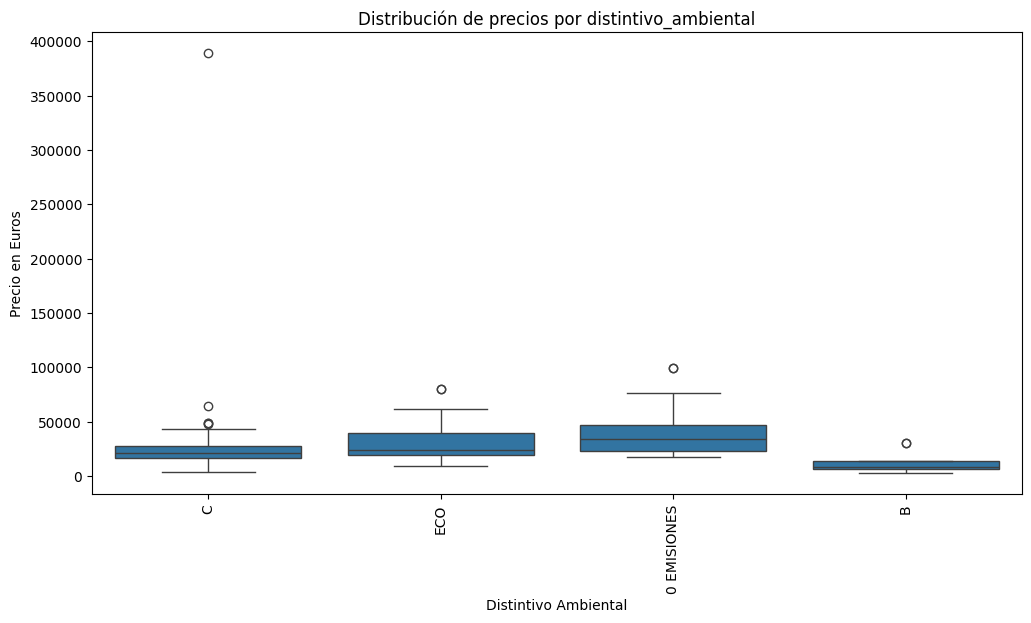

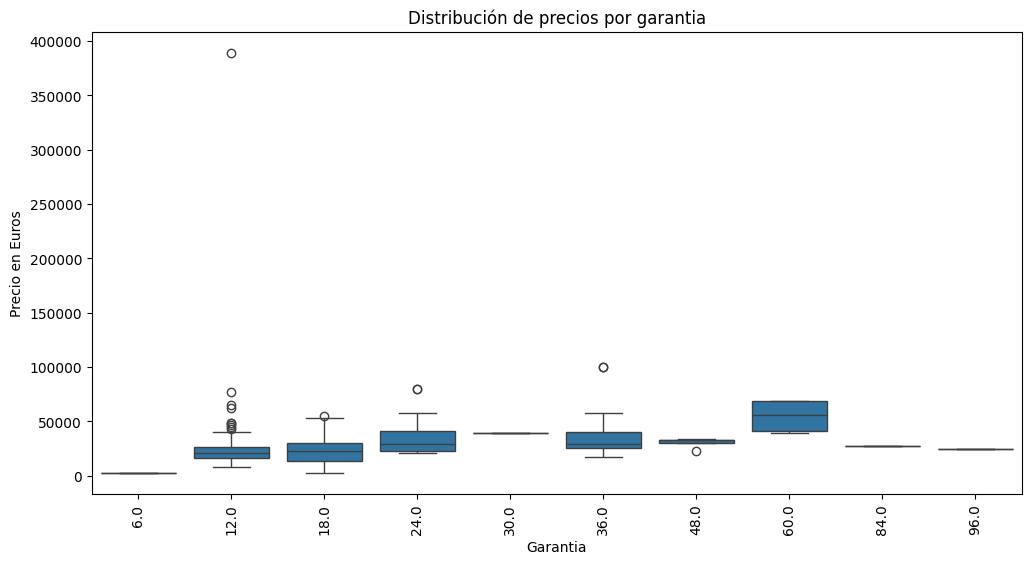

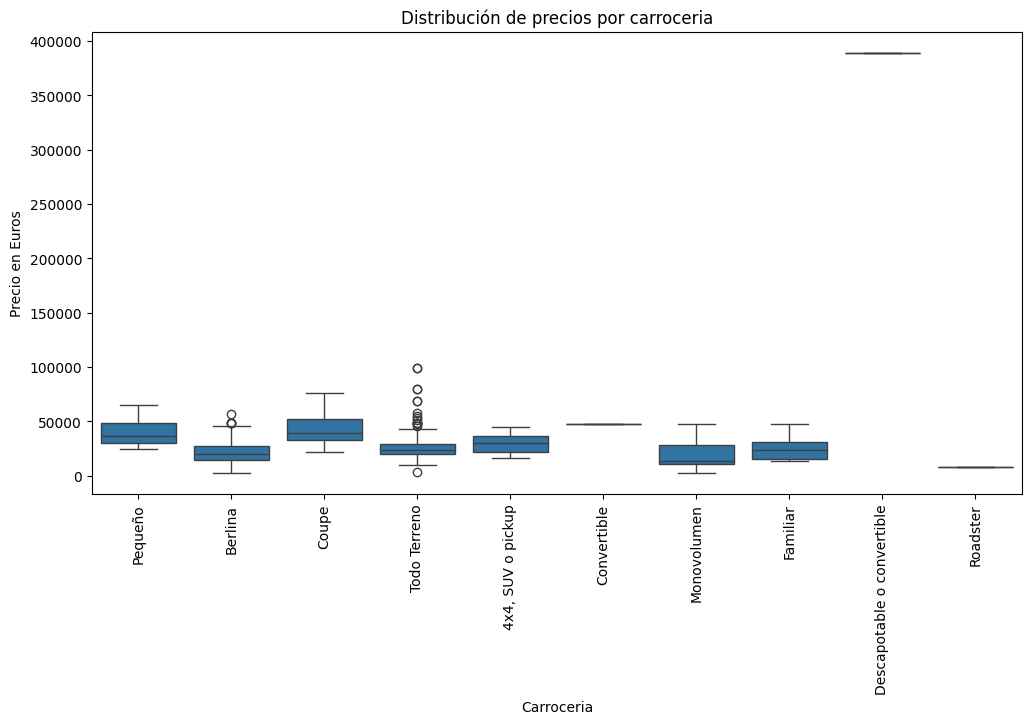

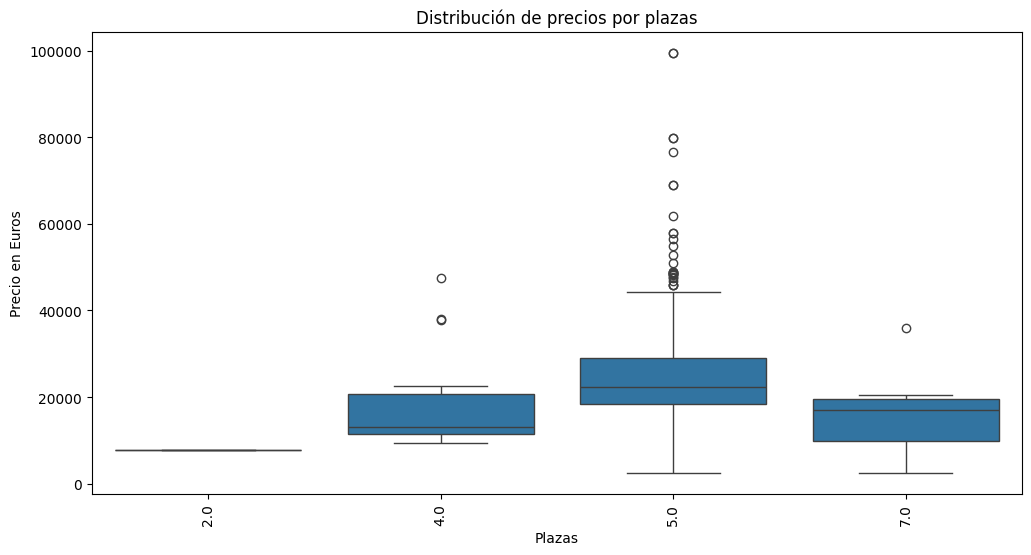

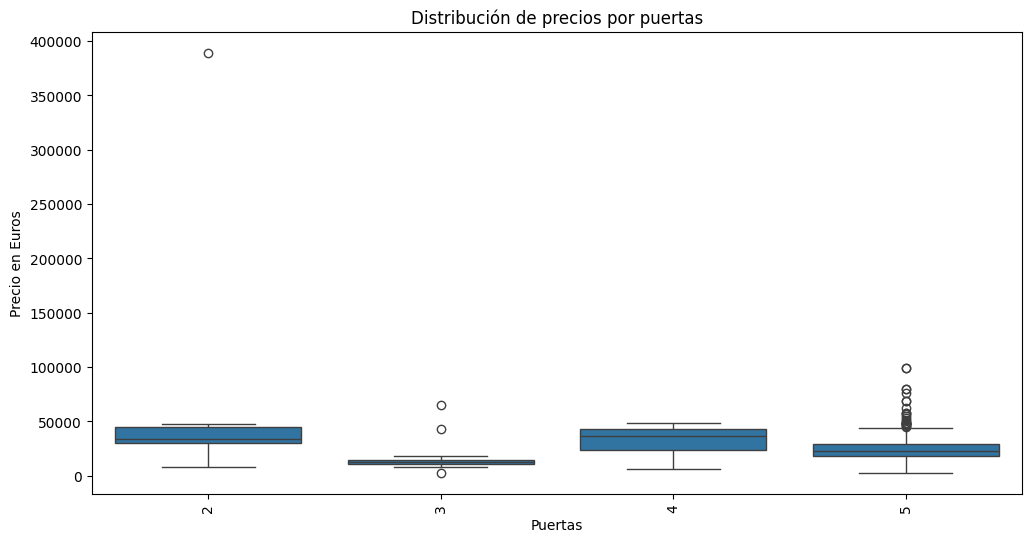

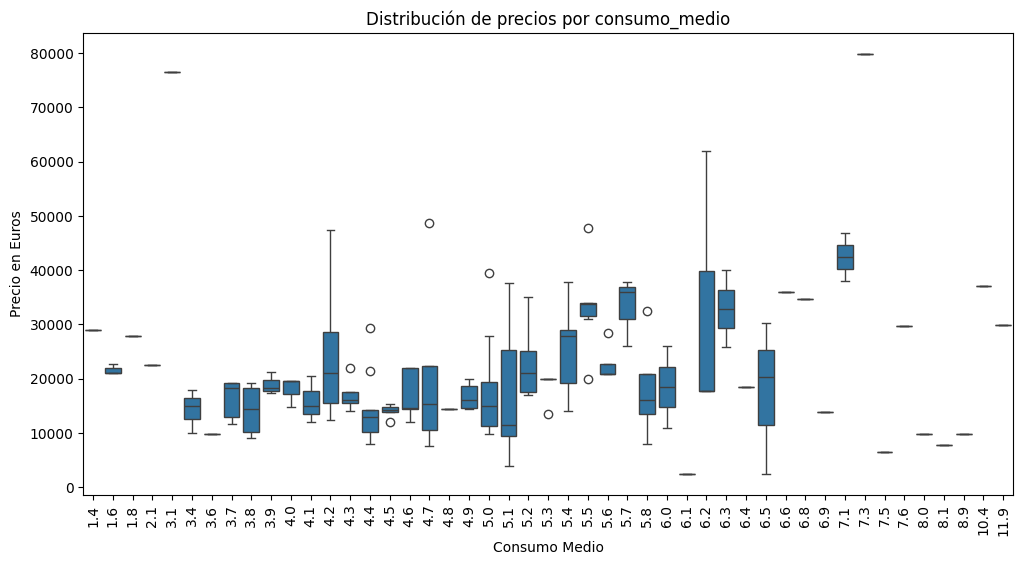

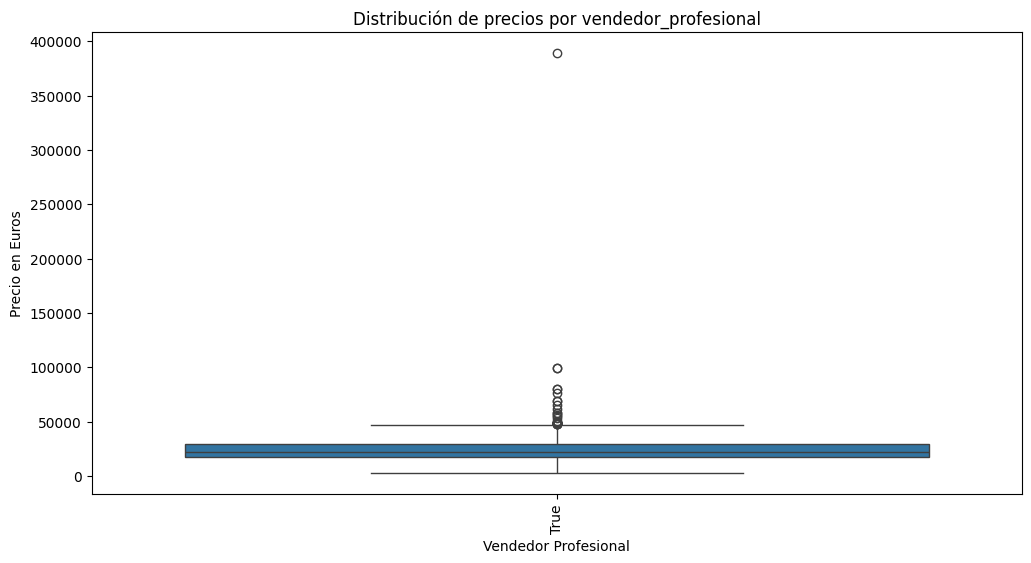

In [42]:
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x= columna, y='precio', data=df)
    plt.xlabel(f"{formatear_texto(columna)}") 
    plt.ylabel("Precio en Euros")
    plt.xticks(rotation=90)
    plt.title(f'Distribución de precios por {columna}')
    plt.show()

In [43]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas


['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

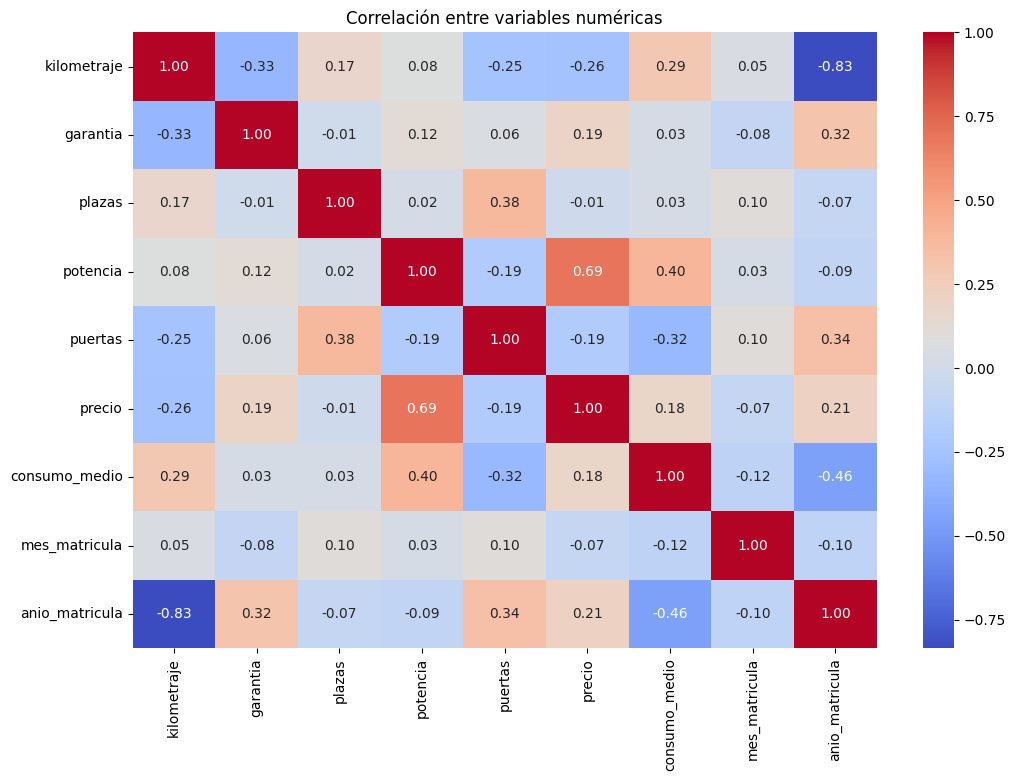

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

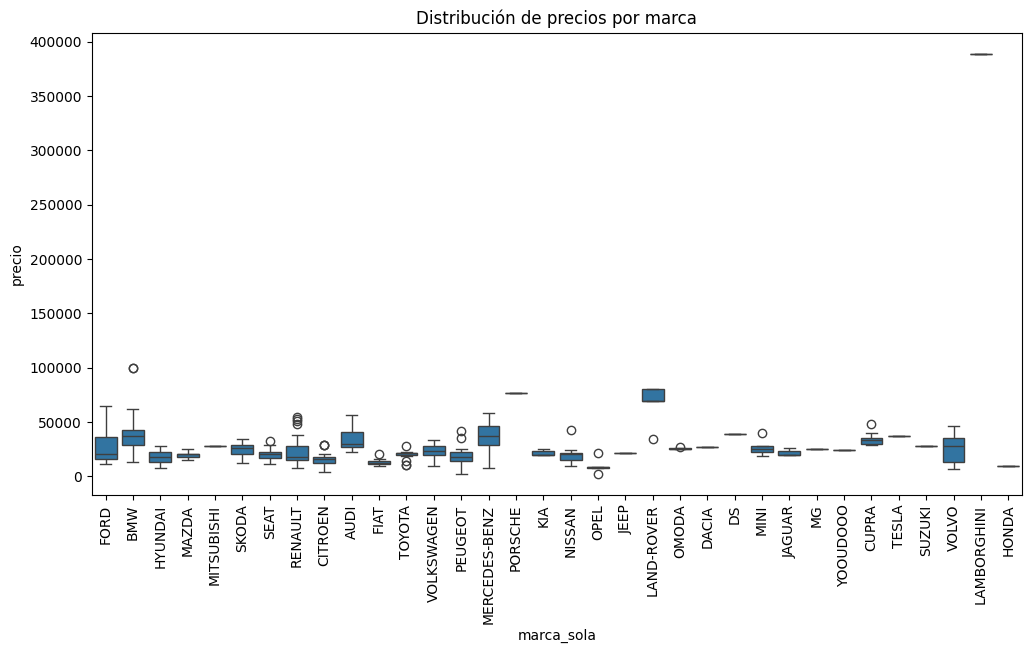

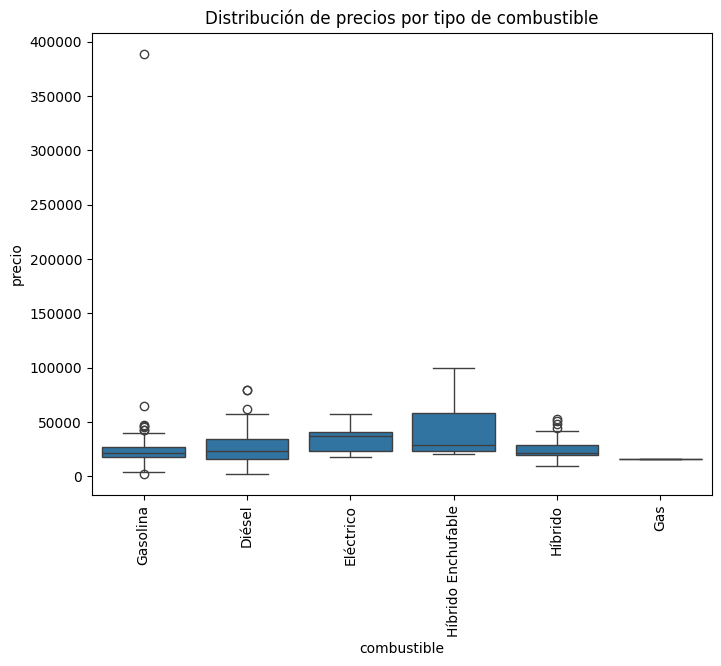

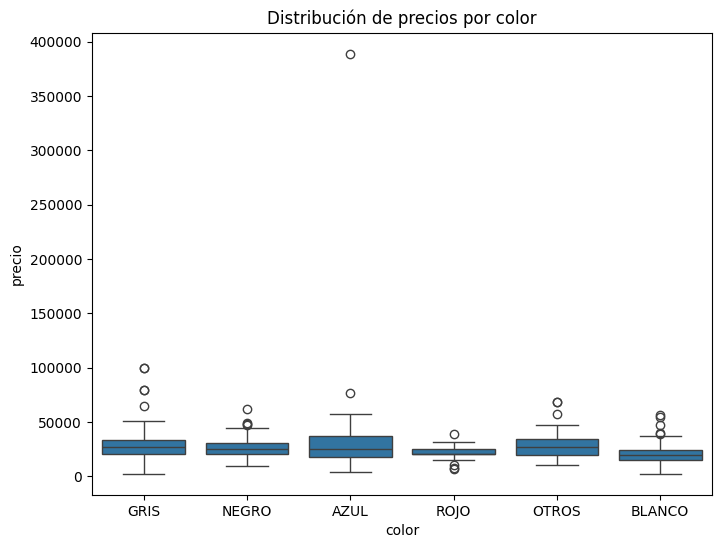

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca_sola', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

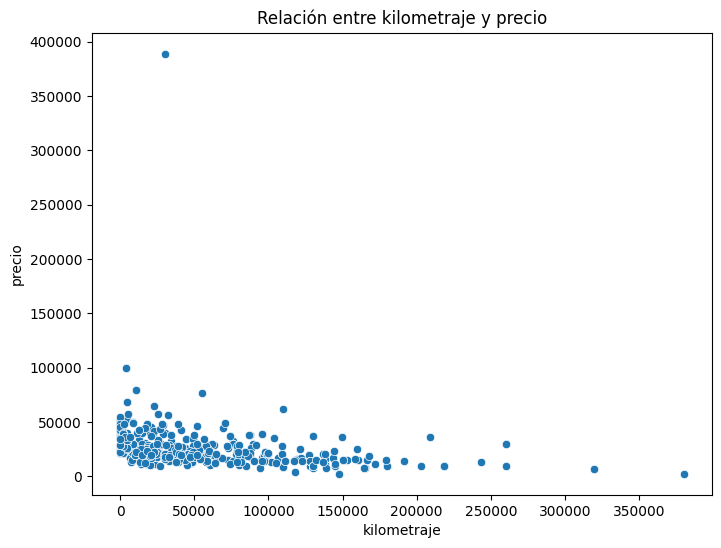

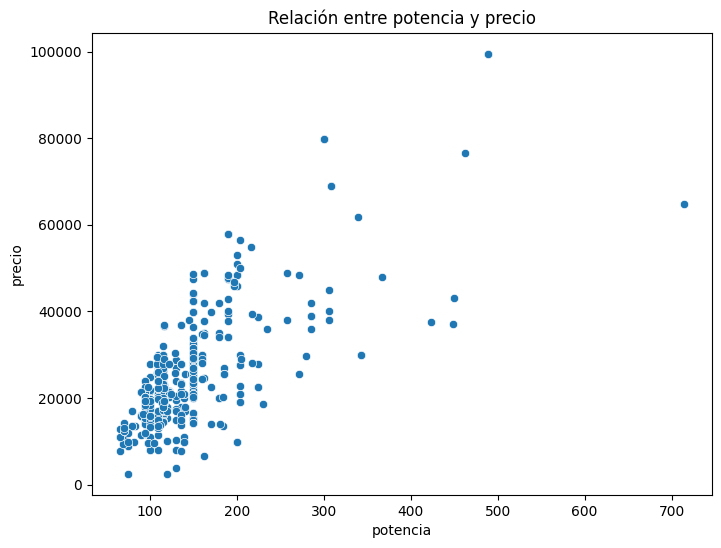

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

## Relación precio y antigüedad de coches

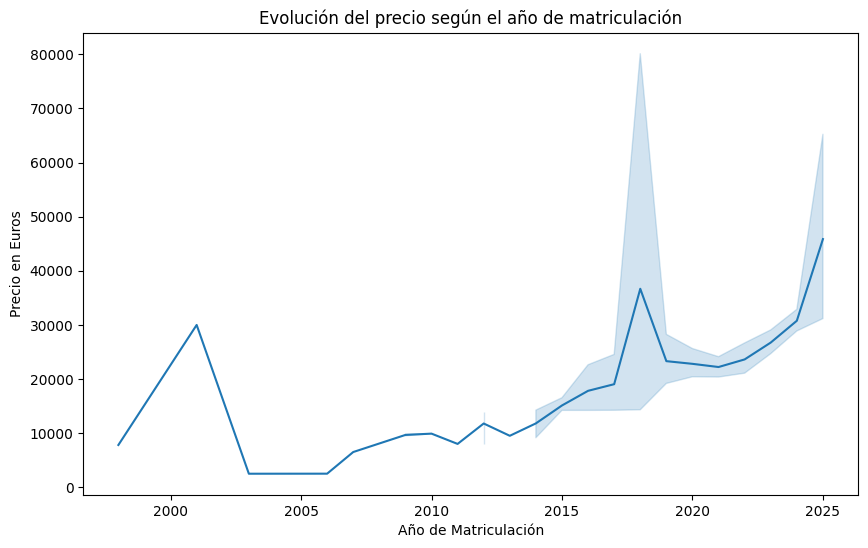

In [47]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio_matricula', y='precio', data=df)
plt.title('Evolución del precio según el año de matriculación')
plt.xlabel("Año de Matriculación") 
plt.ylabel("Precio en Euros")
plt.show()

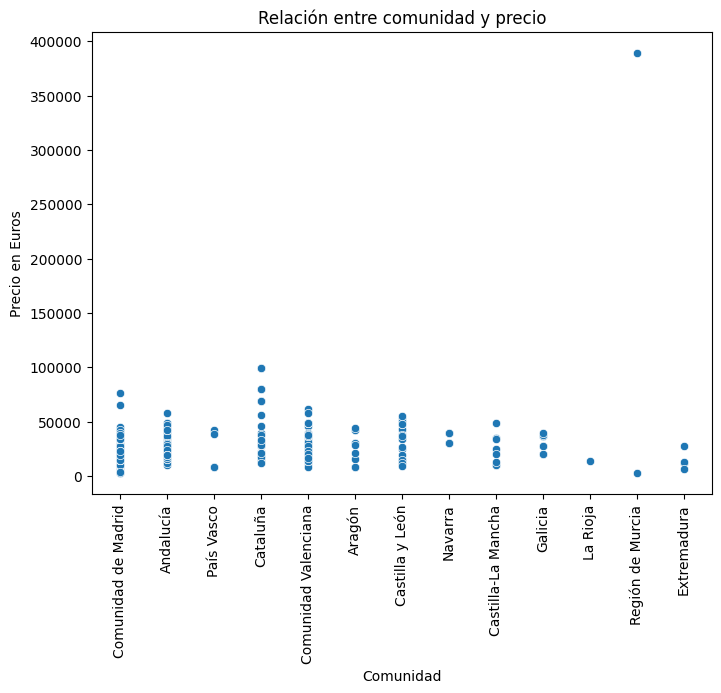

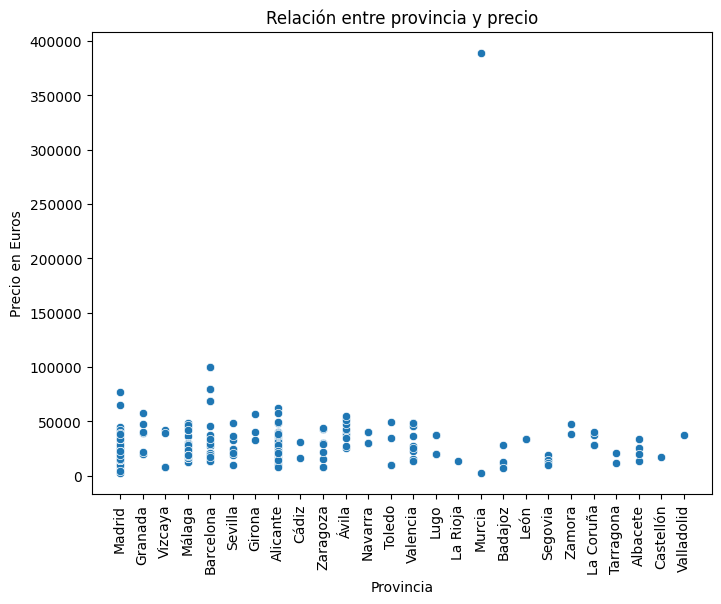

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='comunidad', y='precio', data=df)
plt.title('Relación entre comunidad y precio')
plt.xticks(rotation=90)
plt.xlabel("Comunidad") 
plt.ylabel("Precio en Euros")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='provincia', y='precio', data=df)
plt.title('Relación entre provincia y precio')
plt.xlabel("Provincia") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='codigo_postal', y='precio', data=df)
#plt.title('Relación entre codigo postal y precio')
#plt.xlabel("Código Postal") 
#plt.ylabel("Precio en Euros")
#plt.xticks(rotation=90)
#plt.show()

In [49]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'marca_sola', 'mes_matricula',
       'anio_matricula', 'nombre_vendedor_profesional', 'peninsula_y_baleares',
       'comunidad'],
      dtype='object')

## Definir dos gráficos 


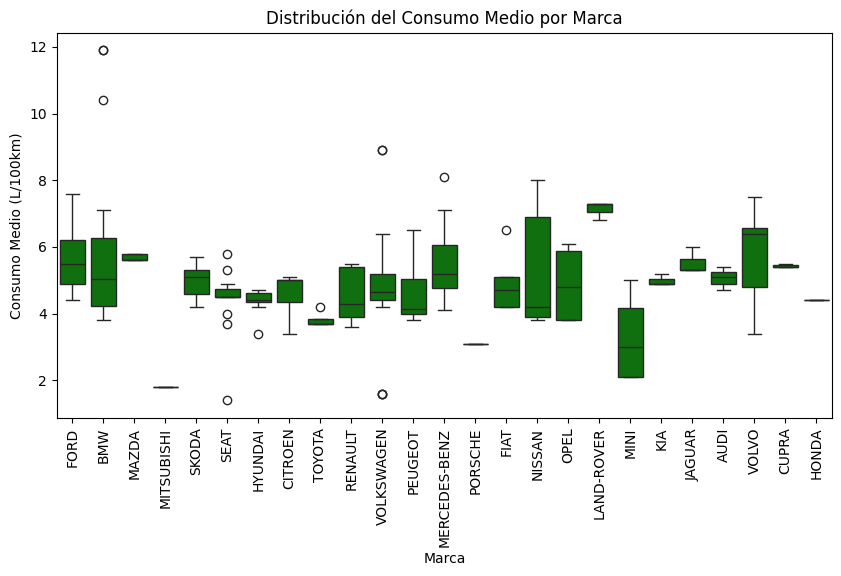

In [50]:
#Relación de consumo medio por marca
plt.figure(figsize=(10,5))

df_consumo = df[df['consumo_medio']>0] 

sns.boxplot(x='marca_sola', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Marca')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por Marca')
plt.xticks(rotation=90)

plt.show()


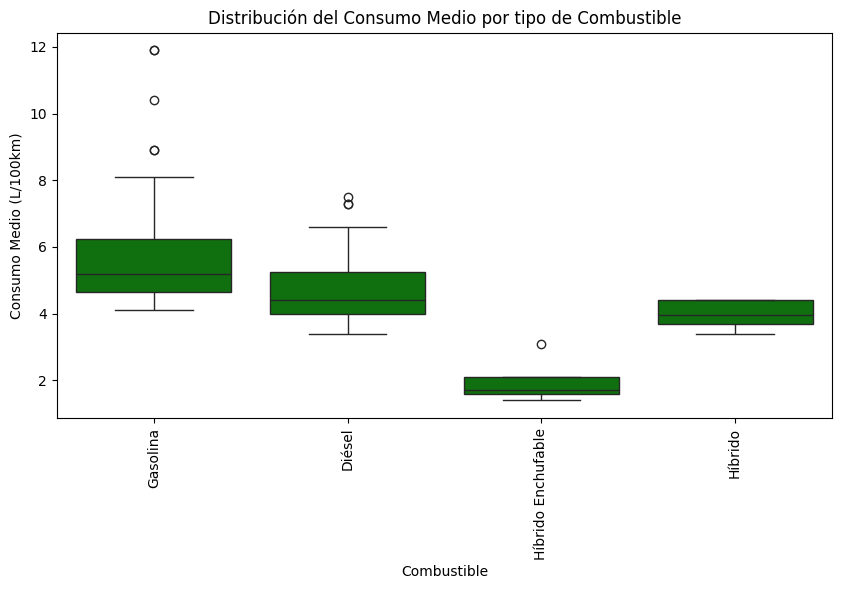

In [51]:
#Relación de consumo medio por tipo de combustible
plt.figure(figsize=(10,5))

sns.boxplot(x='combustible', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Combustible')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por tipo de Combustible')
plt.xticks(rotation=90)

plt.show()

## Gráfico de outliers


La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


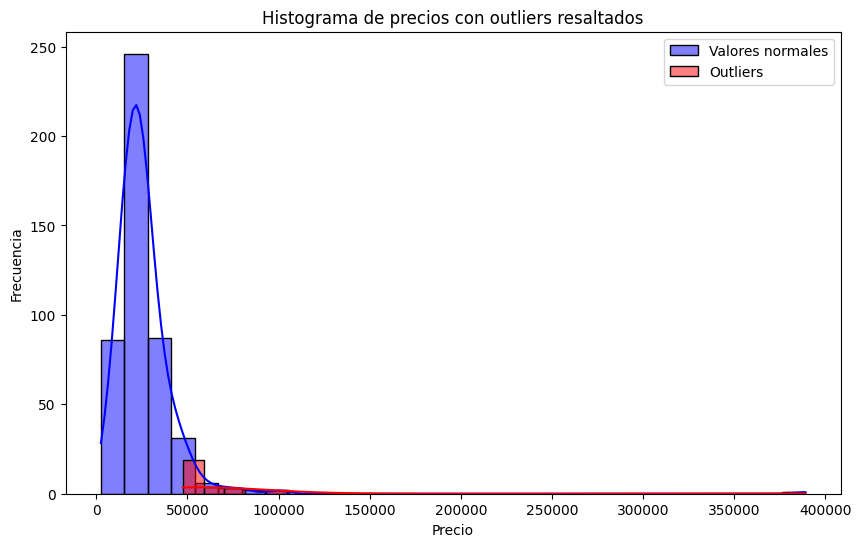

0       64900
3       57900
12      47490
46      76490
67      99500
70      56500
87      52900
93      47750
94      50990
95      54900
113     99500
129     48500
136     68900
138     79900
145     47430
148     48613
150     48500
156     68900
158     79900
185     47900
197     61900
223     48500
234    389000
371     49900
384     48900
386     48900
391     57900
415     48800
417     48300
Name: precio, dtype: int64

In [52]:
from scipy.stats import normaltest, zscore

columna = "precio"

# Prueba de normalidad (normaltest)
stat, p_value = normaltest(df[columna].dropna())  # Eliminar nulos

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  # Valores fuera de ±3 desviaciones estándar son outliers
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

# Grafica histograma con outliers diferenciados
plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

outliers[columna]

## MAPA COROPLETICO

In [53]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()


In [54]:
df_agrupado1

,comunidad,cantidad_coches,precio_medio
0,Andalucía,110,23583.900000
1,Aragón,10,27030.900000
2,Castilla y León,23,31094.739130
3,Castilla-La Mancha,8,24394.750000
4,Cataluña,29,37851.034483
5,Comunidad Valenciana,131,26667.236641
6,Comunidad de Madrid,127,21003.748031
7,Extremadura,4,14699.750000
8,Galicia,8,30862.500000
9,La Rioja,1,13500.000000


In [55]:
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra"
})
df_agrupado1

,comunidad,cantidad_coches,precio_medio
0,Andalucía,110,23583.900000
1,Aragón,10,27030.900000
2,Castilla y León,23,31094.739130
3,Castilla-La Mancha,8,24394.750000
4,Cataluña,29,37851.034483
5,Comunitat Valenciana,131,26667.236641
6,Comunidad de Madrid,127,21003.748031
7,Extremadura,4,14699.750000
8,Galicia,8,30862.500000
9,La Rioja,1,13500.000000


In [56]:
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Aragón': [41.146848953065074, -2.051693319],
    'Castilla y León': [-6.983543504, 41.971848179061865],
    'Castilla-La Mancha': [-5.041794734, 38.728673005078946],
    'Cataluña': [0.514946321, 40.52525092806802],
    'Comunitat Valenciana': [-0.762566145, 37.85512318608558],
    'Comunidad de Madrid': [-3.543904587, 41.165844754065],
    'Extremadura': [-6.931561659, 38.20820979208279],
    'Galicia': [-7.036202862, 43.54518304705791],
    'La Rioja': [42.63838404505985, -2.858067449],
    'Comunidad Foral de Navarra': [-2.415665965, 42.490538486060245],
    'País Vasco': [-3.415445197, 43.13413541505866],
    'Región de Murcia': [-1.545845412, 37.4076178540893]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)

df_agrupado1

,comunidad,cantidad_coches,precio_medio,coordenadas_comunidad
0,Andalucía,110,23583.900000,"[-6.933198279, 38.20515158308281]"
1,Aragón,10,27030.900000,"[41.146848953065074, -2.051693319]"
2,Castilla y León,23,31094.739130,"[-6.983543504, 41.971848179061865]"
3,Castilla-La Mancha,8,24394.750000,"[-5.041794734, 38.728673005078946]"
4,Cataluña,29,37851.034483,"[0.514946321, 40.52525092806802]"
5,Comunitat Valenciana,131,26667.236641,"[-0.762566145, 37.85512318608558]"
6,Comunidad de Madrid,127,21003.748031,"[-3.543904587, 41.165844754065]"
7,Extremadura,4,14699.750000,"[-6.931561659, 38.20820979208279]"
8,Galicia,8,30862.500000,"[-7.036202862, 43.54518304705791]"
9,La Rioja,1,13500.000000,"[42.63838404505985, -2.858067449]"


In [57]:
df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))
df_agrupado1

,comunidad,cantidad_coches,precio_medio,coordenadas_comunidad
0,Andalucía,110,23583.90,"[-6.933198279, 38.20515158308281]"
1,Aragón,10,27030.90,"[41.146848953065074, -2.051693319]"
2,Castilla y León,23,31094.74,"[-6.983543504, 41.971848179061865]"
3,Castilla-La Mancha,8,24394.75,"[-5.041794734, 38.728673005078946]"
4,Cataluña,29,37851.03,"[0.514946321, 40.52525092806802]"
5,Comunitat Valenciana,131,26667.24,"[-0.762566145, 37.85512318608558]"
6,Comunidad de Madrid,127,21003.75,"[-3.543904587, 41.165844754065]"
7,Extremadura,4,14699.75,"[-6.931561659, 38.20820979208279]"
8,Galicia,8,30862.50,"[-7.036202862, 43.54518304705791]"
9,La Rioja,1,13500.00,"[42.63838404505985, -2.858067449]"


In [110]:
import json
import plotly.express as px

# Cargar el archivo GeoJSON de las comunidades autónomas
geojson_url_comunidades = "../src/geojson/comunidades_espana.geojson"

with open(geojson_url_comunidades) as f:
    geojson_data1 = json.load(f)

# Crear un DataFrame de comunidades a partir del geojson
comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  # Usamos 'acom_name' para el nombre de la comunidad
    'geometry': feature['geometry']  # Geometría de la comunidad
} for feature in geojson_data1['features']])

# Unir el DataFrame de comunidades con el de la cantidad de coches usando el DF geojson como principal para que esten todas las comunidades
df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

# Rellenar las comunidades NaNs con 0
df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

# Grafico de choropleth
fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_url_comunidades,               
    locations='comunidad',                  # Busca por el nombre de la comunidad
    featureidkey="properties.acom_name",    # Pasamos el feature id key
    color='cantidad_coches',                # Diferenciaos según la cantidad de coches
    color_continuous_scale="reds",          # Usamos la escala de colores rojos
    mapbox_style="carto-positron",          # Estilo del mapa
    center={"lat": 36.2, "lon": -7.3},  # Centro de España
    zoom=4.7,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  # No mostrar hover
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  # Usar columnas para el hover
)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=1180,  # Ancho fijo en píxeles
    height=1024,  # Alto fijo en píxeles (ajusta según tus necesidades)
    autosize=False,  # Desactiva el ajuste automático de tamaño
)

# Hover
fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)

# titulo de color en la barra lateral
fig.update_layout(coloraxis_colorbar_title="Cantidad de Coches")

fig.show()


/tmp/ipykernel_29762/2606654760.py:24: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [59]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'marca_sola', 'mes_matricula',
       'anio_matricula', 'nombre_vendedor_profesional', 'peninsula_y_baleares',
       'comunidad'],
      dtype='object')

In [60]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio
0,Albacete,4,22992.00
1,Alicante,116,26061.49
2,Badajoz,4,14699.75
3,Barcelona,24,38991.67
4,Castellón,1,16900.00


In [61]:
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio,coordenadas_provincias
0,Albacete,4,22992.00,"(38.9943, -1.8585)"
1,Alicante,116,26061.49,"(38.3452, -0.481)"
2,Badajoz,4,14699.75,"(38.8794, -6.9707)"
3,Barcelona,24,38991.67,"(41.3851, 2.1734)"
4,Castellón,1,16900.00,"(39.9864, -0.0513)"


In [62]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

In [63]:
df_provincias = set(df_agrupado2['provincia'].unique())
geojson_provincias = {feature['properties']['name'] for feature in geojson_data2['features']}


In [64]:
provincias_faltantes_geojson = df_provincias - geojson_provincias
print("Provincias en DataFrame pero NO en GeoJSON:", provincias_faltantes_geojson)

provincias_faltantes_df = geojson_provincias - df_provincias
print("Provincias en GeoJSON pero NO en DataFrame:", provincias_faltantes_df)

Provincias en DataFrame pero NO en GeoJSON: {'Alicante', 'Valencia', 'Castellón', 'Vizcaya', 'La Coruña'}
Provincias en GeoJSON pero NO en DataFrame: {'Cantabria', 'Asturias', 'Cuenca', 'Illes Balears', 'Ceuta', 'Soria', 'Melilla', 'Pontevedra', 'Alacant/Alicante', 'Guadalajara', 'Huesca', 'Ourense', 'A Coruña', 'Santa Cruz De Tenerife', 'Lleida', 'Córdoba', 'Palencia', 'Cáceres', 'Burgos', 'Araba/Álava', 'Jaén', 'Castelló/Castellón', 'Gipuzkoa/Guipúzcoa', 'Teruel', 'Huelva', 'Ciudad Real', 'Bizkaia/Vizcaya', 'Las Palmas', 'Almería', 'València/Valencia', 'Salamanca'}


In [65]:
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio,coordenadas_provincias
0,Albacete,4,22992.00,"(38.9943, -1.8585)"
1,Alacant/Alicante,116,26061.49,"(38.3452, -0.481)"
2,Badajoz,4,14699.75,"(38.8794, -6.9707)"
3,Barcelona,24,38991.67,"(41.3851, 2.1734)"
4,Castelló/Castellón,1,16900.00,"(39.9864, -0.0513)"


In [104]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  # Ajusta según el GeoJSON
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Cantidad de Coches en Venta por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)

fig.update_layout(
    coloraxis_colorbar_title="Cantidad de Coches"
)

fig.show()

/tmp/ipykernel_29762/851271249.py:13: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:

geojson_url_municipios = '../src/geojson/municipios_espana.geojson'

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data = json.load(f)

municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['municipio'],  
    'provincia': feature['properties']['provincia'],  
    'geometry': feature['geometry']
} for feature in geojson_data['features']])

municipios_geojson.head()



In [68]:
dif_df = set(df_agrupado_municipios['municipio']) - set(municipios_geojson['municipio'])

dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado_municipios['municipio'])

print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


NameError: name 'df_agrupado_municipios' is not defined

In [ ]:
correccion_nombres_municipios = {
    "A Coruña": "A Coruña (municipio)",  
    "Elche": "Elx",  
    "San Sebastián": "Donostia/San Sebastián",  
    "Zarautz": "Zarautz (municipio)",  
    "Cádiz": "Cádiz (municipio)"
}

df_agrupado_municipios['municipio'] = df_agrupado_municipios['municipio'].replace(correccion_nombres_municipios)

dif_df = set(df_agrupado_municipios['municipio']) - set(municipios_geojson['municipio'])
dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado_municipios['municipio'])

print("Después de la corrección:")
print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


In [ ]:
df_municipios_final = municipios_geojson.merge(
    df_agrupado_municipios, on=['municipio', 'provincia'], how='left'
).fillna(0)  
df_municipios_final.head()


In [ ]:
fig_municipios = px.choropleth_mapbox(
    df_municipios_final,
    geojson=geojson_url_municipios,
    locations='municipio',
    featureidkey="properties.municipio",
    color='cantidad_coches',  
    color_continuous_scale="reds",
    mapbox_style="carto-positron",
    center={"lat": 40.4168, "lon": -3.7038}, 
    zoom=6,
    title="Distribución de Coches en Venta por Municipio"
)

fig_municipios.show()
